# ETL Project: Car Dealership Data

_Instructions and dataset taken from IBM's [Python Project for Data Engineering](https://www.coursera.org/learn/python-project-for-data-engineering) from Coursera_

# Objectives
- Read CSV, JSON, and XML file types.
- Extract the required data from the different file types.
- Transform data to the required format.
- Save the transformed data in a ready-to-load format, which can be loaded into an RDBMS.

# Prerequisite Steps
## 1.  Gather the data files

```bash
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/datasource.zip
```

> [!NOTE]
> In case of unavailability, a snapshot of datasource.zip is also available in the root directory.
> Date of snapshot: `2025 Mar 24`

## 2. Unzip the downloaded file into a directory named `datasource`

```bash
unzip source.zip -d datasource
```

After extraction, the `datasource` directory is expected to have three(3) CSV files, three(3) JSON files, and three(3) XML files.

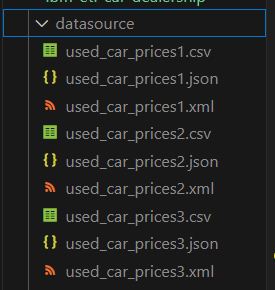

## 3. Install required libraries

```bash
python -m pip install -r requirements.txt
```

Import the necessary libraries

In [3]:
# for iterating to files in a directory
import glob 

# for data frame compilation and utilities
import pandas as pd 

# for parsing XML files
import xml.etree.ElementTree as ET 

# for log timestamps
from datetime import datetime 

# for deleting the log file and output file, if existing, before the whole ETL process is run
import os

Define some constants to be used for the rest of the notebook:

`TARGET_OUTPUT_FILE`: filename of output file

`LOG_FILE`: filename of event log file

In [4]:
TARGET_OUTPUT_FILE = "transformed_data.csv"
LOG_FILE = "log_file.txt"

Delete target output file and log file, if existing, to start each run with a clean slate

In [5]:
if os.path.exists(TARGET_OUTPUT_FILE):
    os.remove(TARGET_OUTPUT_FILE)

if os.path.exists(LOG_FILE):
    os.remove(LOG_FILE)

# Project Task 1: Define logging method
Develop a logging method `log()` that logs a message prefixed with a timestamp and appends it to the file with filename `LOG_FILE` previously defined.

In [6]:
def log(msg):
    timestamp_format = "%Y-%h-%d-%H:%M:%S"
    now = datetime.now()
    timestamp_str = now.strftime(timestamp_format)

    with open(LOG_FILE, "a") as f:
        log_str = timestamp_str + "," + msg + "\n"
        f.write(log_str)

# Project Task 2: Define extract methods
Develop extract methods for the different file formats to be processed in the dataset.


## Extracting from CSV files
**CSV** means comma-separated values. Taking a closer look at one of the input CSV files, we see that the first line contains names of the headers/columns. The headers are then immediately followed by values separated by commas:

In [7]:
# Print contents of one of the input CSV files:
with open('datasource/used_car_prices1.csv', 'r') as file:
    print(file.read())

car_model,year_of_manufacture,price,fuel
ritz,2014,5000.0,Petrol
sx4,2013,7089.55223880597,Diesel
ciaz,2017,10820.89552238806,Petrol
wagon r,2011,4253.731343283582,Petrol
swift,2014,6865.671641791044,Diesel
vitara brezza,2018,13805.970149253732,Diesel
ciaz,2015,10074.626865671642,Petrol
s cross,2015,9701.492537313432,Diesel
ciaz,2016,13059.701492537313,Diesel
ciaz,2015,11119.402985074626,Diesel



Pandas `read_csv()` method can be used straightforwardly to output a dataframe. This useful method also is able to get the column names from the header.

In [8]:
def extract_from_csv(file_to_process):
    log(f"In extract_from_csv(): Extracting from file '{file_to_process}'")
    dataframe = pd.read_csv(file_to_process)
    return dataframe

Calling the method above produces a dataframe that looks like:

In [9]:
print(extract_from_csv('datasource/used_car_prices1.csv'))

       car_model  year_of_manufacture         price    fuel
0           ritz                 2014   5000.000000  Petrol
1            sx4                 2013   7089.552239  Diesel
2           ciaz                 2017  10820.895522  Petrol
3        wagon r                 2011   4253.731343  Petrol
4          swift                 2014   6865.671642  Diesel
5  vitara brezza                 2018  13805.970149  Diesel
6           ciaz                 2015  10074.626866  Petrol
7        s cross                 2015   9701.492537  Diesel
8           ciaz                 2016  13059.701493  Diesel
9           ciaz                 2015  11119.402985  Diesel


## Extracting from JSON files
**JSON** means Javascript Object Notation and is a human-readable open standard file format and data interchange format. Generally comprised of key and value pairs (not dissimilar to a Python Dictionary), the values can be single values or a list.
Sample from one of the input JSON files are shown below:

In [10]:
# Print contents of one of the input JSON files:
with open('datasource/used_car_prices1.json', 'r') as file:
    print(file.read())

{"car_model":"ritz","year_of_manufacture":2012,"price":4626.8656716418,"fuel":"Diesel"}
{"car_model":"ritz","year_of_manufacture":2011,"price":3507.4626865672,"fuel":"Petrol"}
{"car_model":"swift","year_of_manufacture":2014,"price":7388.0597014925,"fuel":"Diesel"}
{"car_model":"ertiga","year_of_manufacture":2014,"price":8955.223880597,"fuel":"Diesel"}
{"car_model":"dzire","year_of_manufacture":2014,"price":8208.9552238806,"fuel":"Diesel"}
{"car_model":"sx4","year_of_manufacture":2011,"price":4402.9850746269,"fuel":"CNG"}
{"car_model":"dzire","year_of_manufacture":2015,"price":6940.2985074627,"fuel":"Petrol"}
{"car_model":"800","year_of_manufacture":2003,"price":522.3880597015,"fuel":"Petrol"}
{"car_model":"alto k10","year_of_manufacture":2016,"price":4477.6119402985,"fuel":"Petrol"}
{"car_model":"sx4","year_of_manufacture":2003,"price":3358.2089552239,"fuel":"Petrol"}



Similar to extracting CSV files, Pandas also has a straightforward method `read_json`.

In [11]:
def extract_from_json(file_to_process):
    log(f"In extract_from_json(): Extracting from file '{file_to_process}'")
    dataframe = pd.read_json(file_to_process, lines=True)
    return dataframe

Calling the method above produces a dataframe that looks like:

In [12]:
print(extract_from_json('datasource/used_car_prices1.json'))

  car_model  year_of_manufacture        price    fuel
0      ritz                 2012  4626.865672  Diesel
1      ritz                 2011  3507.462687  Petrol
2     swift                 2014  7388.059701  Diesel
3    ertiga                 2014  8955.223881  Diesel
4     dzire                 2014  8208.955224  Diesel
5       sx4                 2011  4402.985075     CNG
6     dzire                 2015  6940.298507  Petrol
7       800                 2003   522.388060  Petrol
8  alto k10                 2016  4477.611940  Petrol
9       sx4                 2003  3358.208955  Petrol


## Extracting from XML files
**XML** or the Extensible Markup Language is a markup language and file format used for data exchange. It looks similar to HTML but instead ofuses custom-defined tags instead of pre-defined tags ones. This format is both human-readable and machine-readable.
Shown below is a sample from one of our input XML files:

In [13]:
# Print contents of one of the input XML files:
with open('datasource/used_car_prices1.xml', 'r') as file:
    print(file.read())

<?xml version="1.0" encoding="UTF-8" ?>
<root>
  <row>
    <car_model>corolla altis</car_model>
    <year_of_manufacture>2013</year_of_manufacture>
    <price>10373.134328358208</price>
    <fuel>Petrol</fuel>
  </row>
  <row>
    <car_model>etios cross</car_model>
    <year_of_manufacture>2015</year_of_manufacture>
    <price>6716.417910447762</price>
    <fuel>Petrol</fuel>
  </row>
  <row>
    <car_model>fortuner</car_model>
    <year_of_manufacture>2014</year_of_manufacture>
    <price>27985.074626865673</price>
    <fuel>Diesel</fuel>
  </row>
  <row>
    <car_model>fortuner</car_model>
    <year_of_manufacture>2015</year_of_manufacture>
    <price>35074.62686567164</price>
    <fuel>Diesel</fuel>
  </row>
  <row>
    <car_model>fortuner</car_model>
    <year_of_manufacture>2017</year_of_manufacture>
    <price>49253.73134328358</price>
    <fuel>Diesel</fuel>
  </row>
  <row>
    <car_model>etios liva</car_model>
    <year_of_manufacture>2014</year_of_manufacture>
    <price>7089

We see in the above sample that each node in the XML tree corresponds to a `row`, and that each row has a `car_model`, `year_of_manufacture`, `price`, and `fuel`.

- First, get the tree object using `xml.etree.ElementTree`'s `parse()` method
- Next, we get the tree's root with the `getroot()` method
- From the root, we can traverse the tree in a loop as shown in the succeeding code block
- Each `row` node parsed yields one(1) row which we store to a dictionary
- Compile each parsed row into a list of dicts `rows_list`
- Finally after all XML `row` nodes have been processed, create a Pandas DataFrame from `rows_list`

In [14]:
def extract_from_xml(file_to_process):
    log(f"In extract_from_xml(): Extracting from file '{file_to_process}'")
    rows_list = []
    tree = ET.parse(file_to_process)
    root = tree.getroot()
    for car in root:
        car_model = str(car.find("car_model").text)
        year_of_manufacture = int(car.find("year_of_manufacture").text)
        price = float(car.find("price").text)
        fuel = car.find("fuel").text

        rows_list.append({"car_model":car_model, "year_of_manufacture":year_of_manufacture, "price":price, "fuel":fuel})

    return pd.DataFrame.from_dict(rows_list)

Calling the method above produces a dataframe that looks like:

In [15]:
print(extract_from_xml('datasource/used_car_prices1.xml'))

       car_model  year_of_manufacture         price    fuel
0  corolla altis                 2013  10373.134328  Petrol
1    etios cross                 2015   6716.417910  Petrol
2       fortuner                 2014  27985.074627  Diesel
3       fortuner                 2015  35074.626866  Diesel
4       fortuner                 2017  49253.731343  Diesel
5     etios liva                 2014   7089.552239  Diesel
6         innova                 2017  29477.611940  Petrol
7       fortuner                 2010  13805.970149  Diesel
8  corolla altis                 2011   6492.537313  Petrol
9  corolla altis                 2016  21268.656716  Petrol


## Extract all inputs
After all file types have an extract method, let's create a main `extract()` method that calls all of them in turn to return a single consolidated Pandas DataFrame.

Note that the indices in the partial dataframes shown previously restart from zero every time. To properly index the resulting extracted data frame, it is important to set the `ignore_index` argument to True when Pandas `concat()` is called.

In [16]:
def extract():
    log("In extract(): started")
    # Initialize list of extracted dataframes
    # to be populated as the script goes through the dataset files
    extracted_dfs_list = []

    # Process all CSV files
    log("In extract(): start processing CSV files")
    for csvfile in glob.glob("datasource/*.csv"):
        extracted_dfs_list.append(extract_from_csv(csvfile))
    log("In extract(): done processing CSV files")

    # Process all JSON files
    log("In extract(): start processing JSON files")
    for jsonfile in glob.glob("datasource/*.json"):
        extracted_dfs_list.append(extract_from_json(jsonfile))
    log("In extract(): done processing JSON files")

    # Process all XML files
    log("In extract(): start processing XML files")
    for xmlfile in glob.glob("datasource/*.xml"):
        extracted_dfs_list.append(extract_from_xml(xmlfile))
    log("In extract(): done processing XML files")

    # Concatenate all dataframes in the extracted_dfs_list
    # into a single DataFrame
    # Note that ignore_index is set to True so that the index is rebuilt with properly incrementing values
    extracted_data = pd.concat(extracted_dfs_list, ignore_index=True)

    log("In extract(): ended")
    return extracted_data

Afterwards, let's call the `extract()` method to produce the extracted dataframe `extracted_data` from all of the available input files.

In [17]:
log("ETL Job Started")
extracted_data = extract()

Let's take a peek at our data after extraction:

In [18]:
print(extracted_data.info())
print('\n')
print(extracted_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_model            90 non-null     object 
 1   year_of_manufacture  90 non-null     int64  
 2   price                90 non-null     float64
 3   fuel                 90 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB
None


  car_model  year_of_manufacture         price    fuel
0      ritz                 2014   5000.000000  Petrol
1       sx4                 2013   7089.552239  Diesel
2      ciaz                 2017  10820.895522  Petrol
3   wagon r                 2011   4253.731343  Petrol
4     swift                 2014   6865.671642  Diesel


After extraction, we have 90 extracted data entries without any missing values

The exercise did not call for removal of duplicates, so we assume at this point that each entry is for a different car.

# Project Task 3: Define the Transform method

The only column of interest in terms of transformation is the `price` column. The exercise material requires them to be rounded to two (2) decimal places only.

Below is the `transform()` method:

In [19]:
def transform(data):
    log("In transform(): started")
    
    # Round Price values to 2 decimal places
    data["price"] = round(data["price"], 2)

    log("In transform(): ended")
    return data

Afterwards, let's call the `transform()` method using the `extracted_data` as input.

In [20]:
transformed_data = transform(extracted_data)

Let's look at the first few rows to see if the transformation was done properly:

In [21]:
print('\n')
print(transformed_data.head())



  car_model  year_of_manufacture     price    fuel
0      ritz                 2014   5000.00  Petrol
1       sx4                 2013   7089.55  Diesel
2      ciaz                 2017  10820.90  Petrol
3   wagon r                 2011   4253.73  Petrol
4     swift                 2014   6865.67  Diesel


# Project Task 4: Define the Load method
For the last task, we need to load the extracted and transformed data into a CSV file, which can be in turn loaded into a database. The loading to CSV file is easily done using Pandas `to_csv()` method.

The filename for the output CSV file was previously defined as `TARGET_OUTPUT_FILE`.


In [22]:
def load_data(target_file, transformed_data):
    log(f"In load_data(): Loading data to file '{target_file}'")
    transformed_data.to_csv(target_file)
    log(f"In load_data(): Done loading data to file '{target_file}'")

All that's left to do is to call the `load_data()` method specifying the output filename as `TARGET_OUTPUT_FILE` and the `transformed_data` data frame as the input.

In [23]:
load_data(TARGET_OUTPUT_FILE, transformed_data)
log("ETL Job Ended\n")

# Checking the output file and logs
Shown below are the contents of the output file of the ETL process.

In [24]:
with open(TARGET_OUTPUT_FILE) as out_file:
    print(out_file.read())

,car_model,year_of_manufacture,price,fuel
0,ritz,2014,5000.0,Petrol
1,sx4,2013,7089.55,Diesel
2,ciaz,2017,10820.9,Petrol
3,wagon r,2011,4253.73,Petrol
4,swift,2014,6865.67,Diesel
5,vitara brezza,2018,13805.97,Diesel
6,ciaz,2015,10074.63,Petrol
7,s cross,2015,9701.49,Diesel
8,ciaz,2016,13059.7,Diesel
9,ciaz,2015,11119.4,Diesel
10,alto 800,2017,4253.73,Petrol
11,ciaz,2015,10223.88,Diesel
12,ciaz,2015,11194.03,Petrol
13,ertiga,2015,9104.48,Petrol
14,dzire,2009,3358.21,Petrol
15,ertiga,2016,11567.16,Diesel
16,ertiga,2015,10820.9,Diesel
17,ertiga,2016,11567.16,Diesel
18,wagon r,2015,4850.75,CNG
19,sx4,2010,3955.22,Petrol
20,alto k10,2016,4253.73,Petrol
21,ignis,2017,7313.43,Petrol
22,sx4,2011,6567.16,Petrol
23,alto k10,2014,3731.34,Petrol
24,wagon r,2013,4328.36,Petrol
25,swift,2011,4477.61,Petrol
26,swift,2013,6194.03,Petrol
27,swift,2017,8955.22,Petrol
28,alto k10,2010,2910.45,Petrol
29,ciaz,2015,11119.4,Diesel
30,ritz,2012,4626.87,Diesel
31,ritz,2011,3507.46,Petrol
32,swift,2014,7388.06,

We can also check the contents of the log file after the whole ETL process:

In [25]:
with open(LOG_FILE) as log_file:
    print(log_file.read())

2025-Mar-25-10:46:47,In extract_from_csv(): Extracting from file 'datasource/used_car_prices1.csv'
2025-Mar-25-10:46:49,In extract_from_json(): Extracting from file 'datasource/used_car_prices1.json'
2025-Mar-25-10:46:50,In extract_from_xml(): Extracting from file 'datasource/used_car_prices1.xml'
2025-Mar-25-10:46:50,ETL Job Started
2025-Mar-25-10:46:50,In extract(): started
2025-Mar-25-10:46:50,In extract(): start processing CSV files
2025-Mar-25-10:46:50,In extract_from_csv(): Extracting from file 'datasource\used_car_prices1.csv'
2025-Mar-25-10:46:50,In extract_from_csv(): Extracting from file 'datasource\used_car_prices2.csv'
2025-Mar-25-10:46:50,In extract_from_csv(): Extracting from file 'datasource\used_car_prices3.csv'
2025-Mar-25-10:46:50,In extract(): done processing CSV files
2025-Mar-25-10:46:50,In extract(): start processing JSON files
2025-Mar-25-10:46:50,In extract_from_json(): Extracting from file 'datasource\used_car_prices1.json'
2025-Mar-25-10:46:50,In extract_from_

# Acknowledgements
## Course Instructors
- Ramesh Sannareddy
- Joseph Santarcangelo
- Abhishek Gagneja
## Course Offered By
* [IBM Skills Network](https://www.coursera.org/partners/ibm-skills-network)